<a href="https://colab.research.google.com/github/Shailvi-Thapliyal/skills-introduction-to-gith1ub/blob/main/c06po1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
import tensorflow as tf
import tensorflow
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential #To define the model architecture
from tensorflow.keras.layers import Dense, Input, Dropout, LeakyReLU, BatchNormalization #To define the layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import HeUniform

In [ ]:
path = "/content/drive/MyDrive/Signal (1).csv"

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#there are no null values.

In [ ]:
df.duplicated().sum()

240

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


<Axes: xlabel='Signal_Strength', ylabel='Count'>

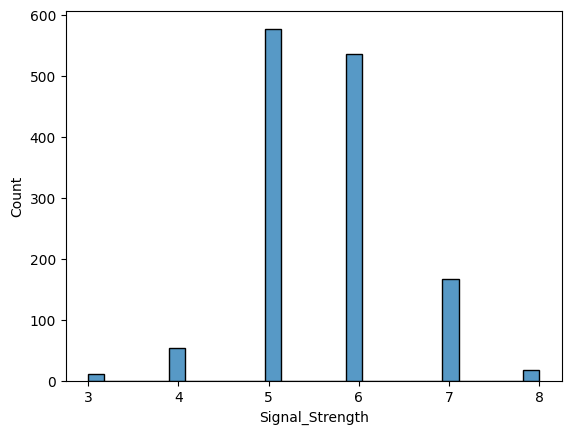

In [ ]:
sns.histplot(data = df['Signal_Strength'])

In [ ]:
df.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000




1.   The data for target column is skewed.
2.   Most of the signal strength is around 5 and 6.



In [ ]:
X = df.drop('Signal_Strength', axis =1)
y = df['Signal_Strength']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(951, 11)
(408, 11)
(951,)
(408,)


In [ ]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
X_test_sc[0:5]

array([[-0.35421567,  0.51724945, -1.191325  ,  1.08555451, -0.09217662,
         0.90637448, -0.05485241,  0.60539334,  0.20919976, -0.74531737,
        -0.84751613],
       [-0.06291586,  0.60206053, -0.88415372, -0.31969489, -0.31404951,
         0.90637448,  0.39176269, -0.17589784, -0.12550578,  0.54928869,
         0.44472273],
       [ 0.05360407, -0.89626845,  0.80528833, -0.15437143, -0.51575214,
        -0.35978458, -0.82898525, -0.66007828, -0.92879908,  0.90236307,
         0.72163106],
       [ 0.9275035 , -0.21777986,  1.57321653,  0.83756932,  0.10952601,
        -0.65197513, -0.11440109,  2.03592647, -0.12550578, -0.45108872,
        -1.30903001],
       [-1.16985514,  2.77887809, -1.39610586, -0.40235662, -0.11234688,
         0.12719967, -0.68011355, -1.28180999,  1.88272747, -0.62762591,
         0.72163106]])

In [ ]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)


In [ ]:
model = Sequential()
model.add(Dense(64, input_shape=(11,), activation='softmax'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 6)                 198       
                                                                 
Total params: 3046 (11.90 KB)
Trainable params: 3046 (11.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
tr_history1= model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=50, batch_size=32 )

Epoch 1/50
30/30 [==============================] - 0s 9ms/step - loss: 0.9200 - accuracy: 0.6088 - val_loss: 0.9259 - val_accuracy: 0.6152
Epoch 2/50
30/30 [==============================] - 0s 4ms/step - loss: 0.9067 - accuracy: 0.6120 - val_loss: 0.9351 - val_accuracy: 0.6152
Epoch 3/50
30/30 [==============================] - 0s 4ms/step - loss: 0.9002 - accuracy: 0.6172 - val_loss: 0.9257 - val_accuracy: 0.6176
Epoch 4/50
30/30 [==============================] - 0s 4ms/step - loss: 0.8845 - accuracy: 0.6257 - val_loss: 0.9178 - val_accuracy: 0.6299
Epoch 5/50
30/30 [==============================] - 0s 4ms/step - loss: 0.9119 - accuracy: 0.6099 - val_loss: 0.9371 - val_accuracy: 0.5931
Epoch 6/50
30/30 [==============================] - 0s 4ms/step - loss: 0.9074 - accuracy: 0.6099 - val_loss: 0.9262 - val_accuracy: 0.6103
Epoch 7/50
30/30 [==============================] - 0s 4ms/step - loss: 0.9175 - accuracy: 0.6025 - val_loss: 0.9286 - val_accuracy: 0.6054
Epoch 8/50
30/30 [==

Text(0.5, 1.0, 'Training and validation loss')

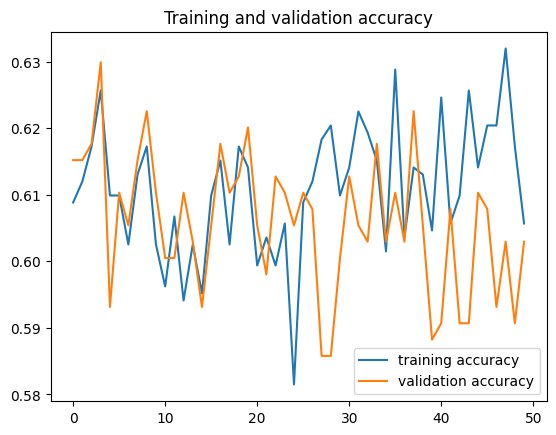

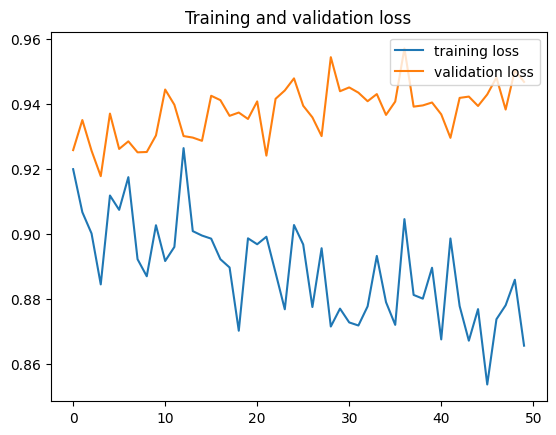

In [ ]:
## Accuracy and Loss plots

accuracy      = tr_history1.history['accuracy']
val_accuracy  = tr_history1.history['val_accuracy']
loss     = tr_history1.history['loss']
val_loss = tr_history1.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

In [ ]:
#model_2


In [ ]:
model_2= Sequential()
model_2.add(Dense(84, input_shape=(11,)))
model_2.add(Dense(28, activation=LeakyReLU()))
model_2.add(Dropout(0.20))
model_2.add(Dense(56, activation=LeakyReLU()))
model_2.add(Dropout(0.20))
model_2.add(Dense(64, activation = LeakyReLU()))
model_2.add(Dropout(0.20))
model_2.add(Dense(6, activation='softmax'))

In [ ]:
model_2.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 84)                1008      
                                                                 
 dense_73 (Dense)            (None, 28)                2380      
                                                                 
 dropout_26 (Dropout)        (None, 28)                0         
                                                                 
 dense_74 (Dense)            (None, 56)                1624      
                                                                 
 dropout_27 (Dropout)        (None, 56)                0         
                                                                 
 dense_75 (Dense)            (None, 64)                3648      
                                                                 
 dropout_28 (Dropout)        (None, 64)              

In [ ]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
tr_history2= model_2.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=50, batch_size=32 )

Epoch 1/50
30/30 [==============================] - 1s 10ms/step - loss: 1.3888 - accuracy: 0.4648 - val_loss: 1.0869 - val_accuracy: 0.5784
Epoch 2/50
30/30 [==============================] - 0s 4ms/step - loss: 1.1358 - accuracy: 0.5394 - val_loss: 0.9936 - val_accuracy: 0.6078
Epoch 3/50
30/30 [==============================] - 0s 3ms/step - loss: 1.0930 - accuracy: 0.5552 - val_loss: 0.9696 - val_accuracy: 0.6005
Epoch 4/50
30/30 [==============================] - 0s 4ms/step - loss: 1.0729 - accuracy: 0.5668 - val_loss: 0.9647 - val_accuracy: 0.5833
Epoch 5/50
30/30 [==============================] - 0s 4ms/step - loss: 1.0316 - accuracy: 0.5794 - val_loss: 0.9627 - val_accuracy: 0.6078
Epoch 6/50
30/30 [==============================] - 0s 3ms/step - loss: 1.0330 - accuracy: 0.5647 - val_loss: 0.9538 - val_accuracy: 0.5980
Epoch 7/50
30/30 [==============================] - 0s 3ms/step - loss: 1.0115 - accuracy: 0.5752 - val_loss: 0.9537 - val_accuracy: 0.5907
Epoch 8/50
30/30 [=

Text(0.5, 1.0, 'Training and validation loss')

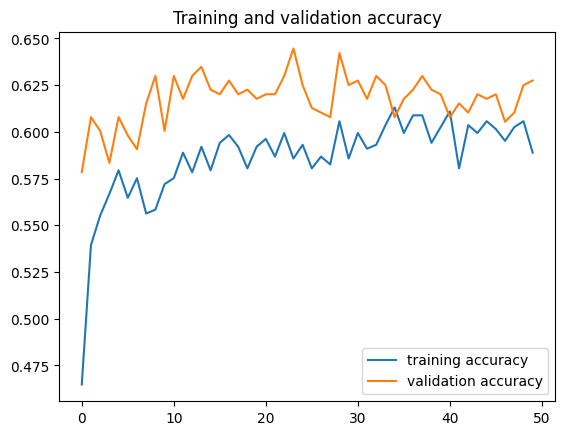

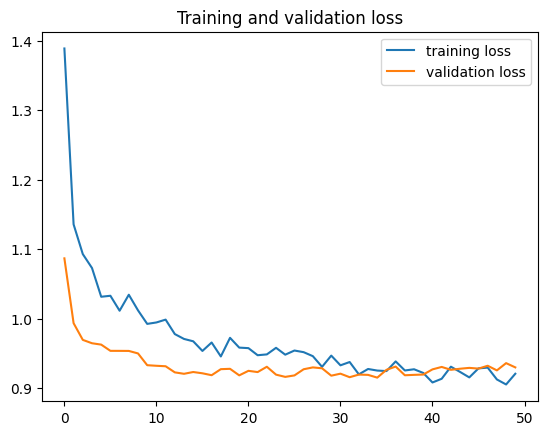

In [ ]:
## Accuracy and Loss plots

accuracy      = tr_history2.history['accuracy']
val_accuracy  = tr_history2.history['val_accuracy']
loss     = tr_history2.history['loss']
val_loss = tr_history2.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

In [ ]:
model_3 = tf.keras.models.Sequential()
model_3.add(Dense(784,input_shape=(11,)))

#add new layer
model_3.add(Dense(256,activation='softmax', kernel_initializer=HeUniform(seed=7)))

model_3.add(BatchNormalization(momentum=0.6))
model_3.add(Dropout(0.2))

model_3.add(Dense(128, activation='relu',kernel_initializer=HeUniform(seed=7)))
model_3.add(BatchNormalization(momentum=0.6))
model_3.add(Dropout(0.2))

model_3.add(Dense(64, activation='relu',kernel_initializer=HeUniform(seed=7)))
model_3.add(BatchNormalization(momentum=0.6))
model_3.add(Dropout(0.2))

model_3.add(Dense(32, activation='relu',kernel_initializer=HeUniform(seed=7)))

#Output layer
model_3.add(Dense(6, activation='softmax'))

In [ ]:
model_3.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 784)               9408      
                                                                 
 dense_67 (Dense)            (None, 256)               200960    
                                                                 
 batch_normalization_9 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_23 (Dropout)        (None, 256)               0         
                                                                 
 dense_68 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_10 (Ba  (None, 128)               512       
 tchNormalization)                                   

In [ ]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
tr_history3= model_3.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=100, batch_size=32 )
learning_rate = model_3.optimizer.learning_rate
model_3.optimizer.learning_rate = learning_rate / 2

Epoch 1/100
30/30 [==============================] - 0s 14ms/step - loss: 0.6151 - accuracy: 0.7571 - val_loss: 1.2889 - val_accuracy: 0.5588
Epoch 2/100
30/30 [==============================] - 0s 14ms/step - loss: 0.6288 - accuracy: 0.7392 - val_loss: 1.3846 - val_accuracy: 0.5343
Epoch 3/100
30/30 [==============================] - 0s 10ms/step - loss: 0.6367 - accuracy: 0.7287 - val_loss: 1.3672 - val_accuracy: 0.5515
Epoch 4/100
30/30 [==============================] - 0s 9ms/step - loss: 0.6017 - accuracy: 0.7487 - val_loss: 1.3057 - val_accuracy: 0.5515
Epoch 5/100
30/30 [==============================] - 0s 8ms/step - loss: 0.5939 - accuracy: 0.7592 - val_loss: 1.2701 - val_accuracy: 0.5466
Epoch 6/100
30/30 [==============================] - 0s 7ms/step - loss: 0.5820 - accuracy: 0.7613 - val_loss: 1.2940 - val_accuracy: 0.5417
Epoch 7/100
30/30 [==============================] - 0s 9ms/step - loss: 0.5925 - accuracy: 0.7560 - val_loss: 1.3202 - val_accuracy: 0.5441
Epoch 8/10

Text(0.5, 1.0, 'Training and validation loss')

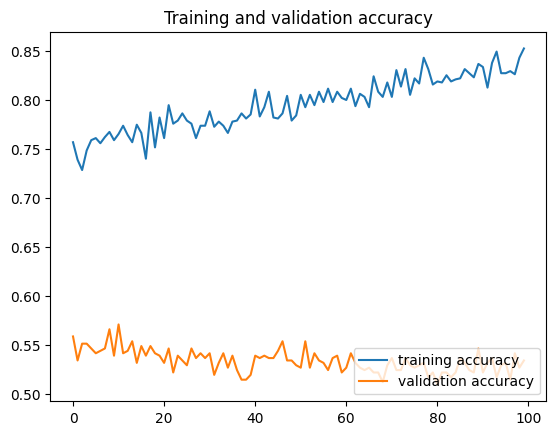

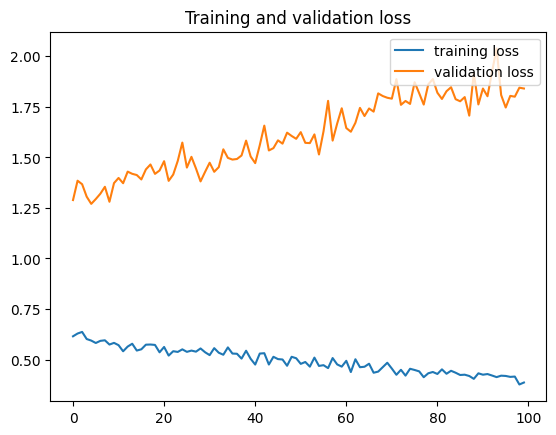

In [ ]:
## Accuracy and Loss plots

accuracy      = tr_history3.history['accuracy']
val_accuracy  = tr_history3.history['val_accuracy']
loss     = tr_history3.history['loss']
val_loss = tr_history3.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Conclusion : The model is unable to learn anything however Model 2 has slightly better accuracy.